In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
#pd.set_option ('display. mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

#Read data from a csv file

The basics of using the read_csv function are covered in this notebook. In order to perform these functions you will need to install additional python modules, they are included in the above cell. Data transformation is not covered at length here, just some date time conversions.


read_csv function is a good start as most enterprise RDBMS will usually offer this format for export or data dump. Comma-separated by default

About this first data set: FDIC Failed Bank List. This list includes banks which have failed since October 1, 2000. Build a simple method to count the number of records in this file, this will be used in the first automation layer to determine if the site has added any new rows.  A full import into the dataframe will occur less fequently to determine if data in the source file has changed, a basic diff operation.


The second data set is one that I created to mimic common office duties, the purpose of the Python code is to automate report generation on large sets from files in a data warehouse.

In [10]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.csv'
result = requests.get(url)

In [11]:
result.status_code

200

In [ ]:
fail_banks = pd.read_csv('../banklist.csv')

In [ ]:
fail_bank

In [ ]:
!ls -al

In [6]:
result.headers

{'Content-Type': 'text/csv', 'Content-Length': '45496', 'Connection': 'keep-alive', 'Date': 'Tue, 09 Apr 2019 03:10:11 GMT', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'max-age=30', 'Content-Security-Policy': 'require-sri-for script', 'Expires': 'Tue, 09 Apr 2019 03:10:41 GMT', 'Last-Modified': 'Wed, 06 Feb 2019 20:10:49 GMT', 'X-Amz-Version-Id': 'icLFjZwIDlOtmJpE6wqAFzU78DES_pNl', 'X-Ua-Compatible': 'IE=Edge,chrome=1', 'X-Vcap-Request-Id': '8a15bd0a-89ab-4b12-5873-6d7d047029b1', 'X-Frame-Options': 'ALLOW', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Cache': 'Miss from cloudfront', 'Via': '1.1 316430958c7664ce84a9544466b4155f.cloudfront.net (CloudFront)', 'X-Amz-Cf-Id': 'ggM-LSgBIp23ROKtY3bzx0wlaBzKFSpnp3j8kEPxxdP1k96bxxf5Og=='}

In [6]:
wkrpt = pd.read_csv('test_weekly_reports.csv')

In [7]:
wkrpt[:9]

,week;invoice_count;invoice_total;item_count;sales_commission
0,14-Apr-2019;647;24706.61;27821;1235.33
1,07-Apr-2019;841;49726.68;13456;2486.33
2,31-Mar-2019;952;83051.31;20944;4152.57
3,24-Mar-2019;858;56883.87;52338;2844.19
4,17-Mar-2019;1162;5483.27;54614;274.16
5,10-Mar-2019;957;94412.56;72732;4720.63
6,03-Mar-2019;1073;82820.41;66526;4141.02
7,24-Feb-2019;857;29456.35;27424;1472.82
8,17-Feb-2019;918;54447.50;58752;2722.38


In [5]:
# Look at the first 3 rows, you can see that dataframe import is not clear
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


read_csv options that can clean up this file:

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [14]:
invoice_df = pd.read_csv('test_weekly_reports.csv', sep=';', parse_dates=['week'], dayfirst=True, index_col='week')

invoice_df[:3]

,invoice_count,invoice_total,item_count,sales_commission
week,,,,
2019-04-14,647,24706.61,27821,1235.33
2019-04-07,841,49726.68,13456,2486.33
2019-03-31,952,83051.31,20944,4152.57


In [15]:

#invoice_df['week'] = pd.to_datetime(invoice_df['week'])
#invoice_df['week'] = pd.to_datetime(invoice_df['week'])
invoice_df[:4]

,invoice_count,invoice_total,item_count,sales_commission
week,,,,
2019-04-14,647,24706.61,27821,1235.33
2019-04-07,841,49726.68,13456,2486.33
2019-03-31,952,83051.31,20944,4152.57
2019-03-24,858,56883.87,52338,2844.19


#Select a column, perfom a simple sum

When you read a CSV, you get a kind of object called
A DataFrame is made up of rows and columns, select these the same way you get elements out of a dictionary.

In [24]:
x = sum(invoice_df['sales_commission'])
print(x)

99357.54


# 1.3 Plotting a column

Just add `.plot()` to the end of your function.  

This should show that not many people are biking in January, February, and March, 

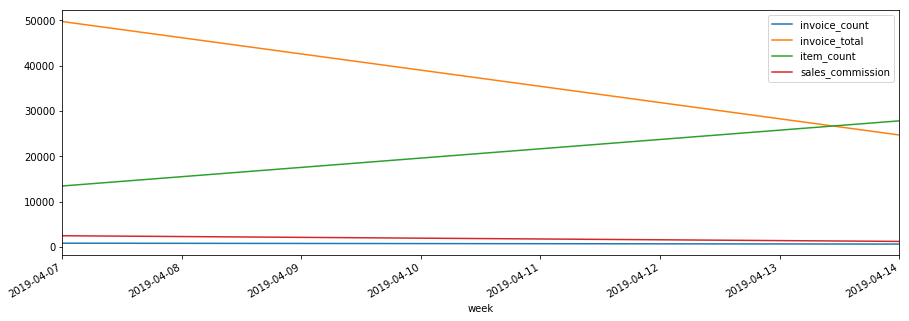

In [43]:
invoice_df[:2].plot()  #figsize=(30, 25))

We can also plot all the columns just as easily. We'll make it a little bigger, too.
For the invoice plot you can see that invoice counts do not vary much between months, but the item counts and invoice total monetary values have high variance.  The sales commissions seem to match the invoice totals, but a log regression needs to be applied to show the relationship more clearly.

For the bike path example you can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

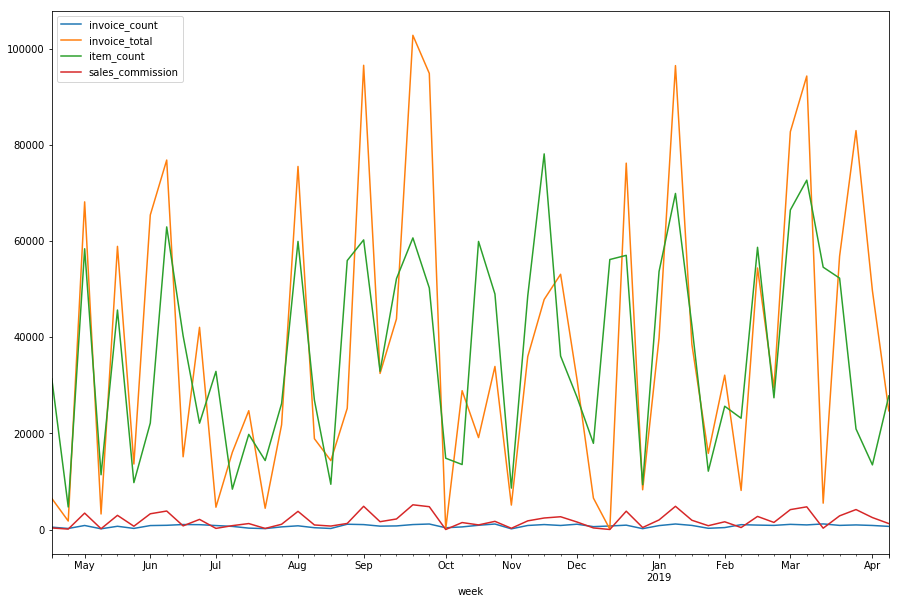

In [31]:
invoice_df.plot(figsize=(15, 10))

# 1.4 Putting all that together

Here's the code we needed to write do draw that graph, all together:

In [ ]:
df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  